# Project 3 - Machine Learning Classification

### The aim for this project is to predict whether a client would be more inclinded to purchase car insurance based on a number of features.

## Step1: Initial data inspection, exploratory data analysis, and cleaning

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import the data set as a pandas dataframe
insurance_df = pd.read_csv('car_insurance.csv')

### Data Inspection

In [4]:
insurance_df.head()
#insurance_df.set_index('Id', inplace=True)
#insurance_df.info()
#insurance_df.shape
#insurance_df.isnull().sum()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


Things to note:
- There are 4000 rows and 19 columns
- 11 features (columns) are int type, 8 features are string type 
- The following features have NaN (all are string type)
    - Job: 19
    - Education: 169
    - Communication: 902
    - Outcome: 3042


## Exploratory Data Analysis

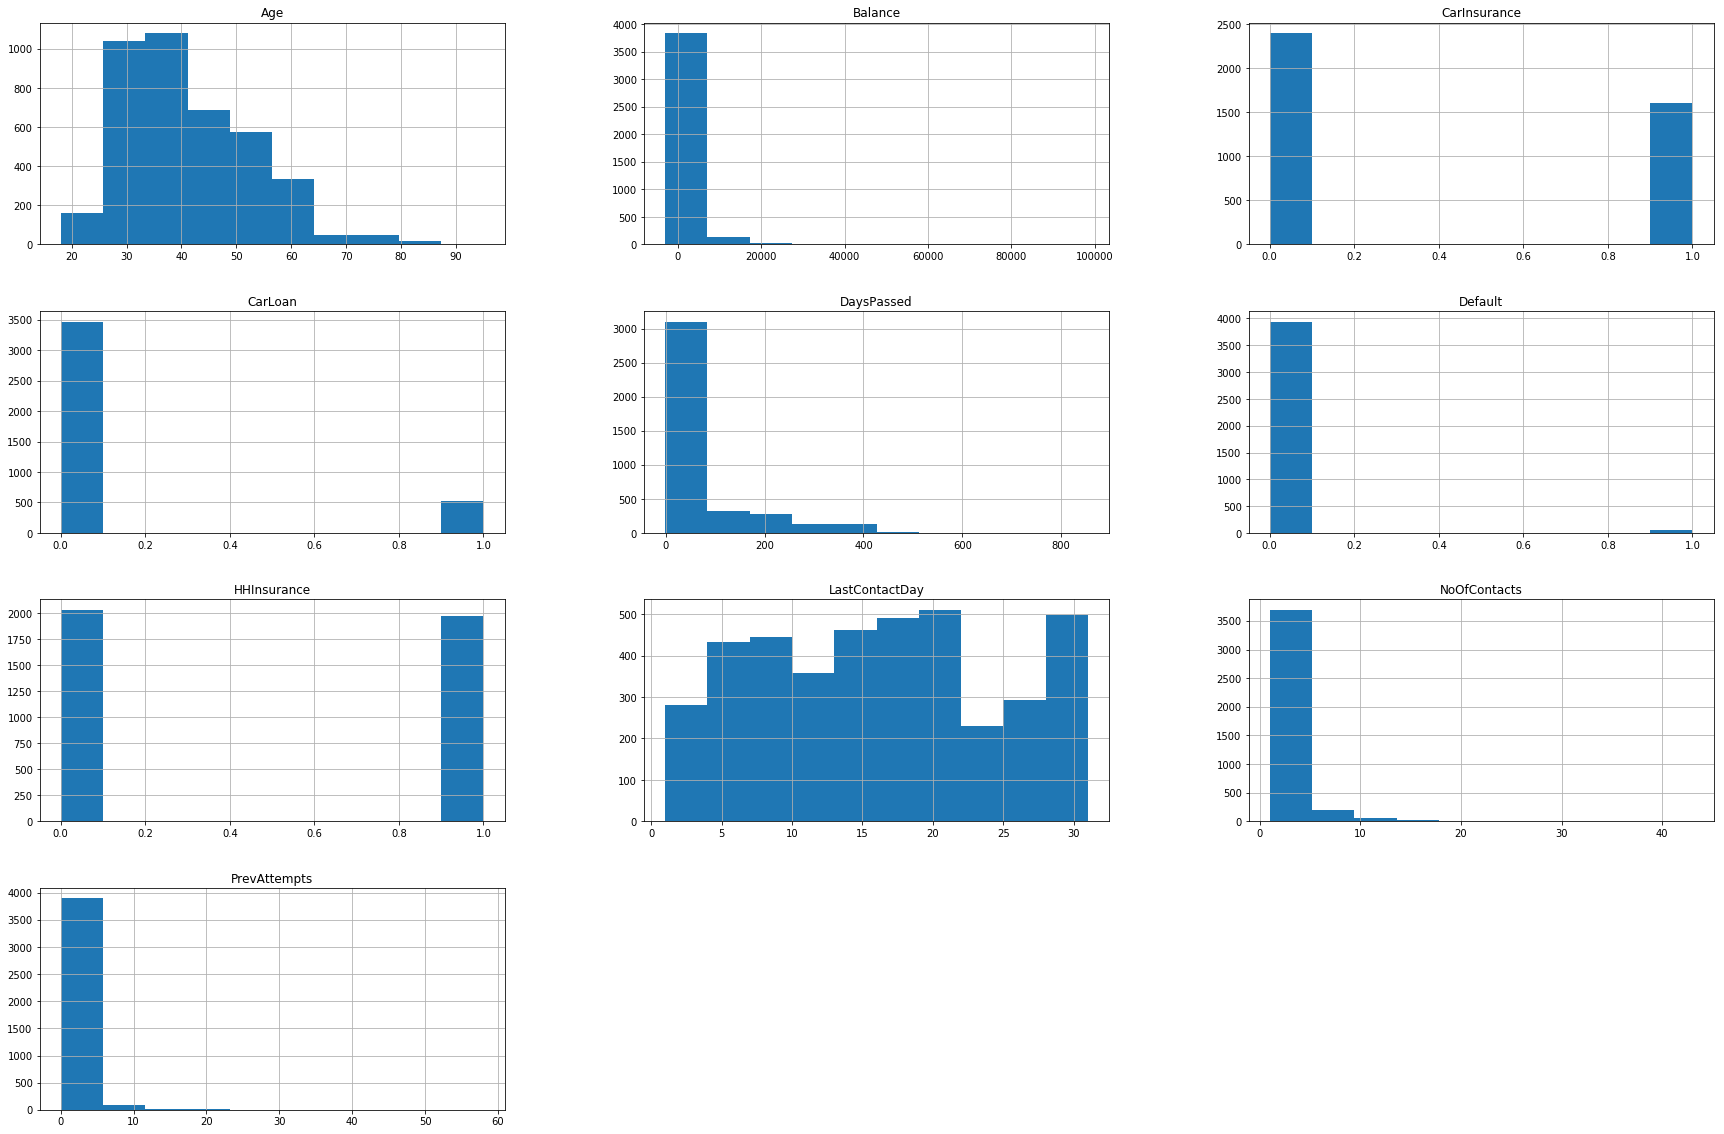

In [12]:
insurance_df.hist(figsize=(30,20), bins=10);

Things to note:
- CarInsurance, CarLoan, Deafult, HHInsurance are all binary (1 or 0)

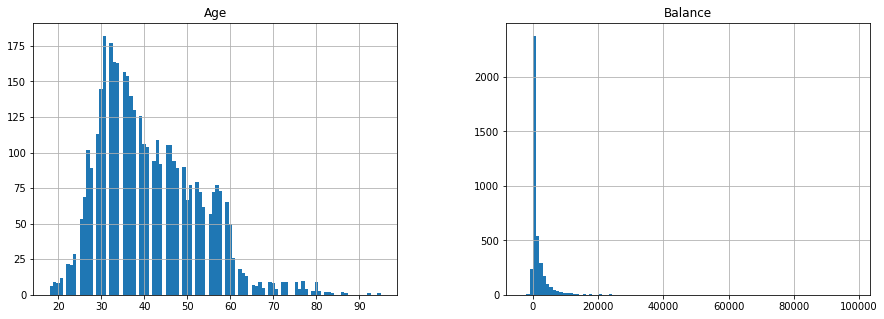

In [19]:
insurance_df[['Balance', 'Age']].hist(bins=100, figsize=(15,5));

In [24]:
print(insurance_df['Age'].mean())
print(insurance_df['Age'].mode())
insurance_df['Age'].describe()

41.21475
0    31
dtype: int64


count    4000.000000
mean       41.214750
std        11.550194
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: Age, dtype: float64

Things to note:
- the average age of the client is 41, while most are 31

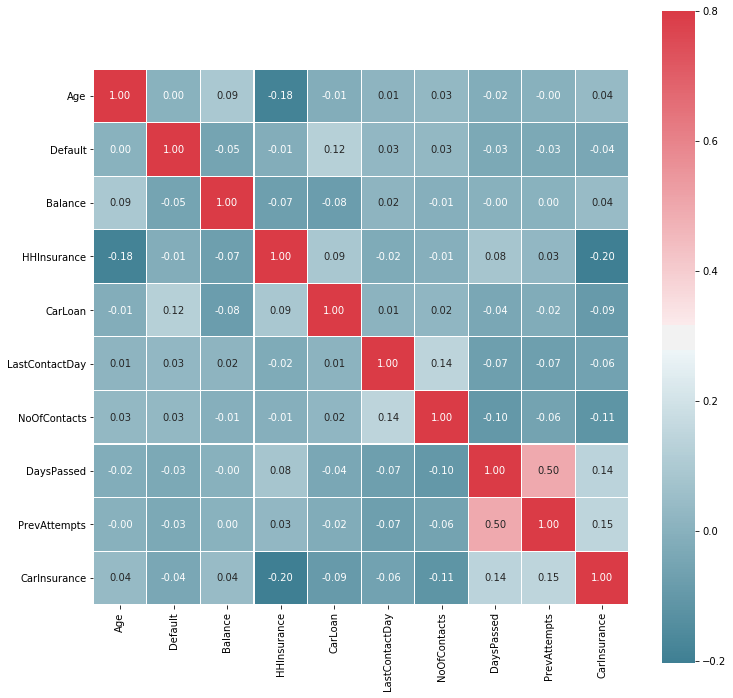

In [14]:
#heatmap to check for correlation
corr = insurance_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=0.8,cmap=cmap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1);

Things to note:
- the numerical features are independent
- 'PrevAttempts' and 'DaysPassed' have slight correlation. Nothing to be concerned with
- 'Age', 'Balance', 'DaysPassed', and 'PrevAttempts' have a positive correlation with respect to 'CarInsurance'
- 'Default', 'HHInsurance', 'CarLoan', 'LastContactDay', and 'NoOfContacts' have a negative correlation with respect to 'CarInsurance'

C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

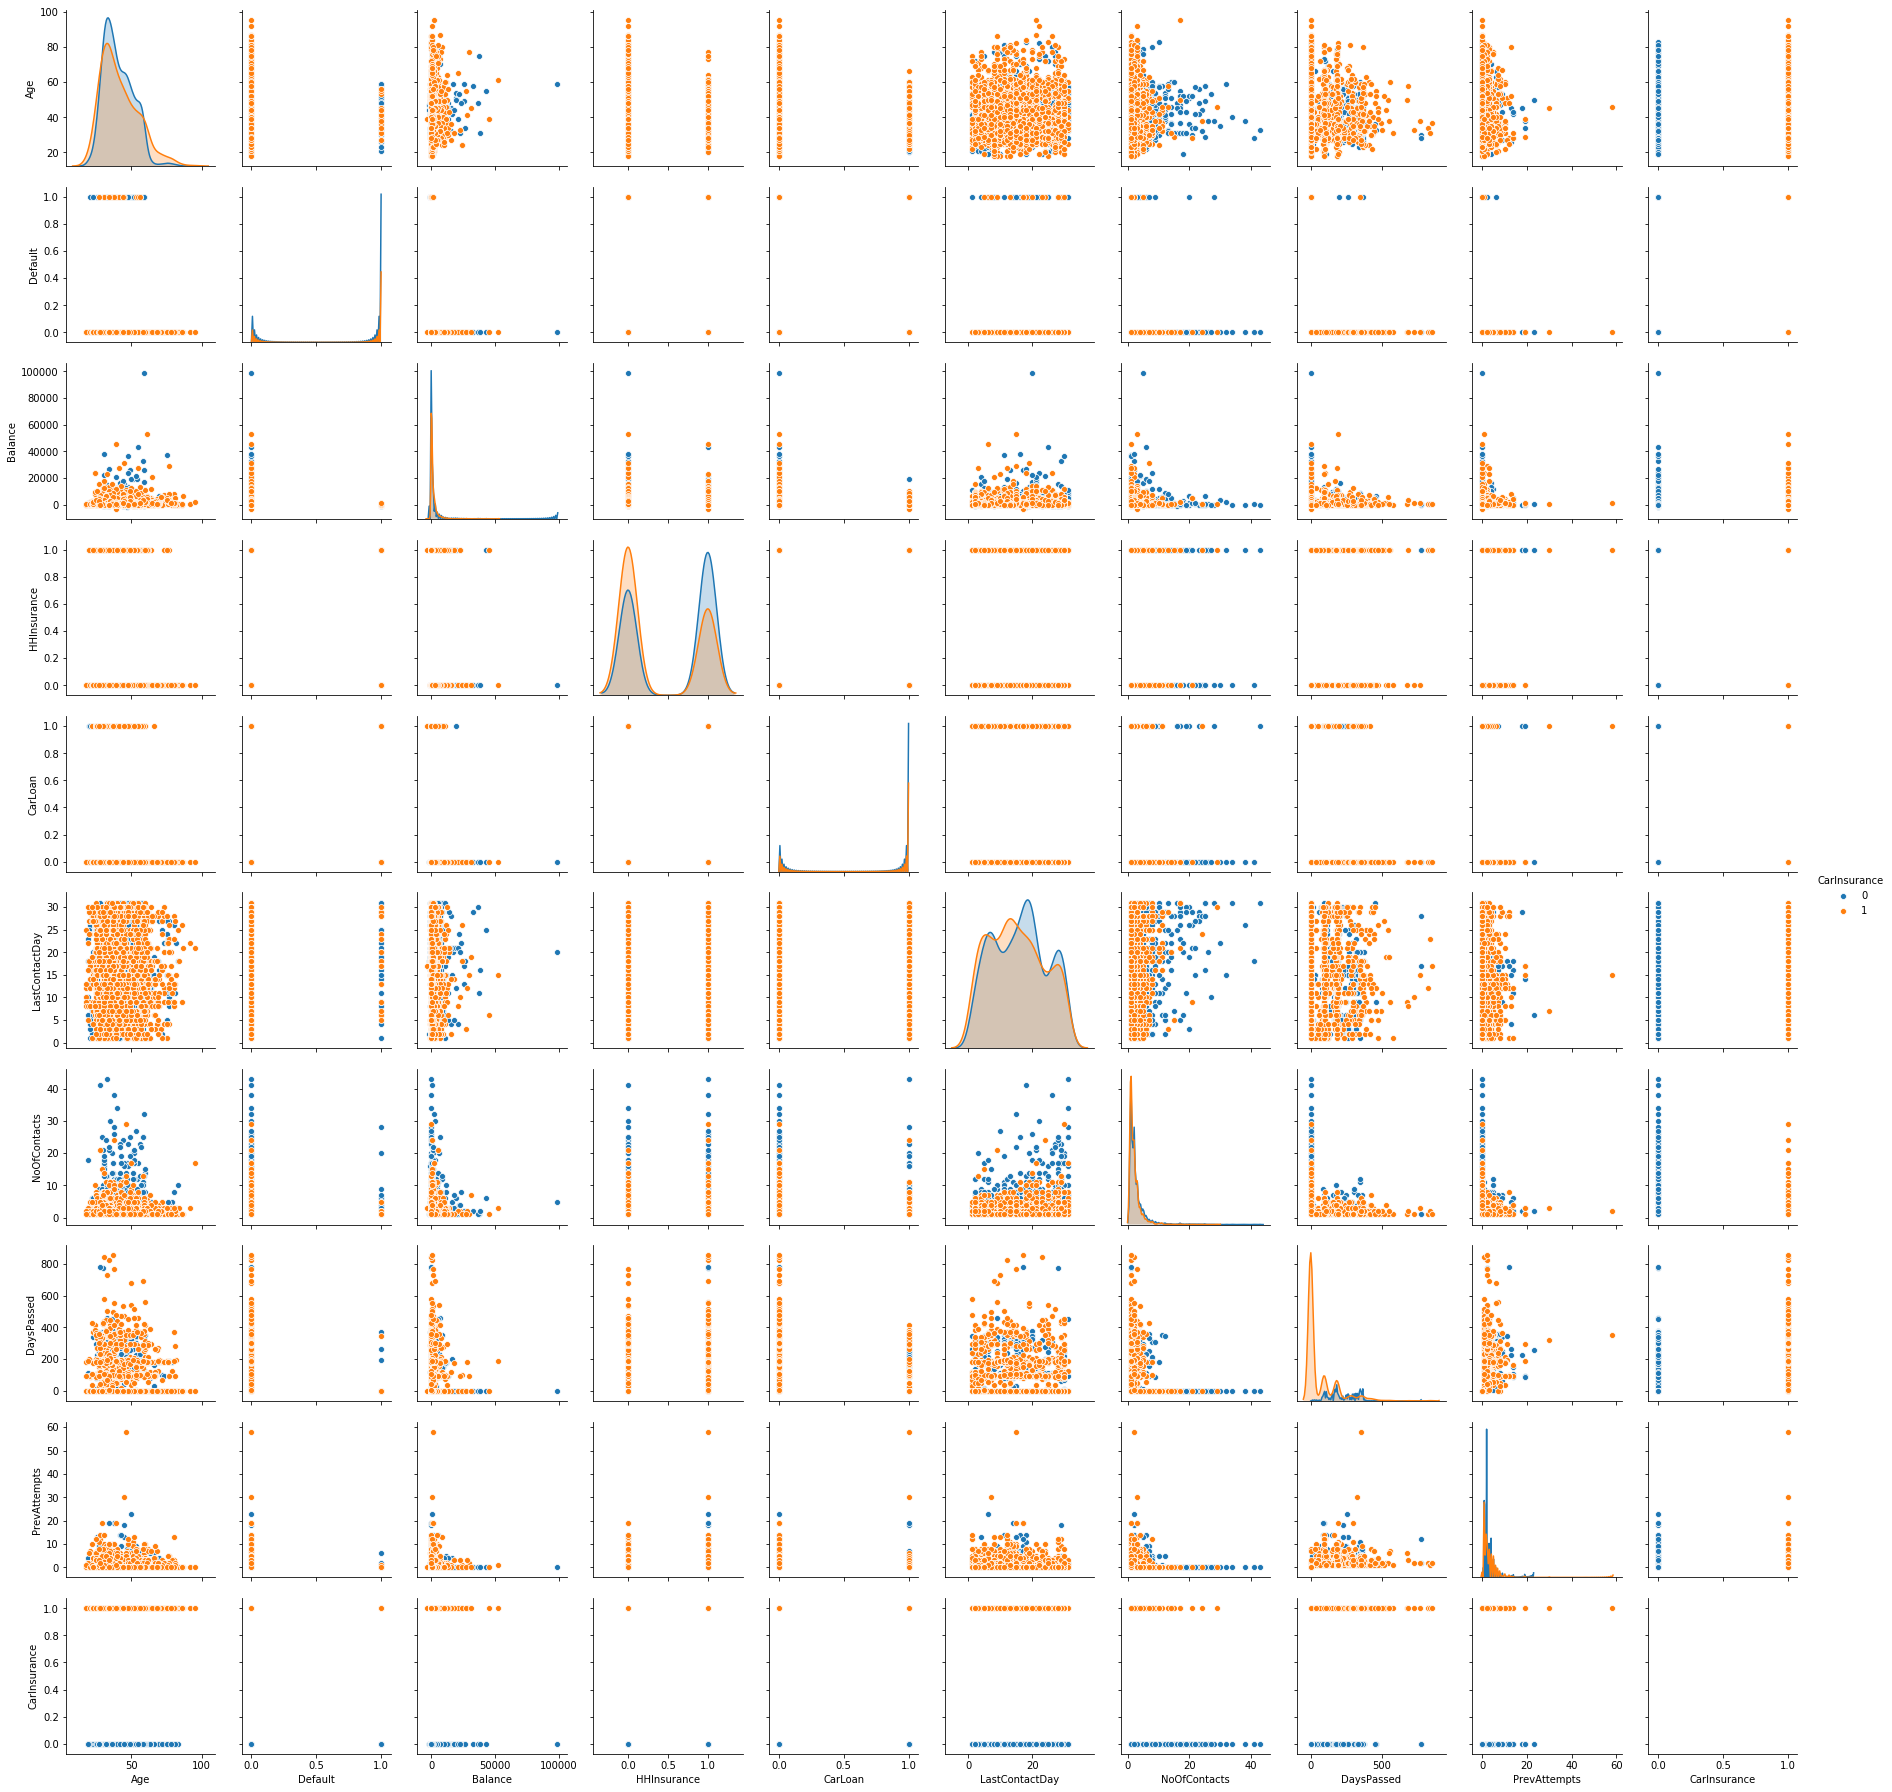

In [5]:
import seaborn as sns

features = ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance']
sns.pairplot(insurance_df[features], hue='CarInsurance');

Things to note:
- nothing really stands out in terms of correlation or a linear relationship
- older individuales seem to buy car insurance more than younger individuales 
- there seems to be an outlier in 'balance'

C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


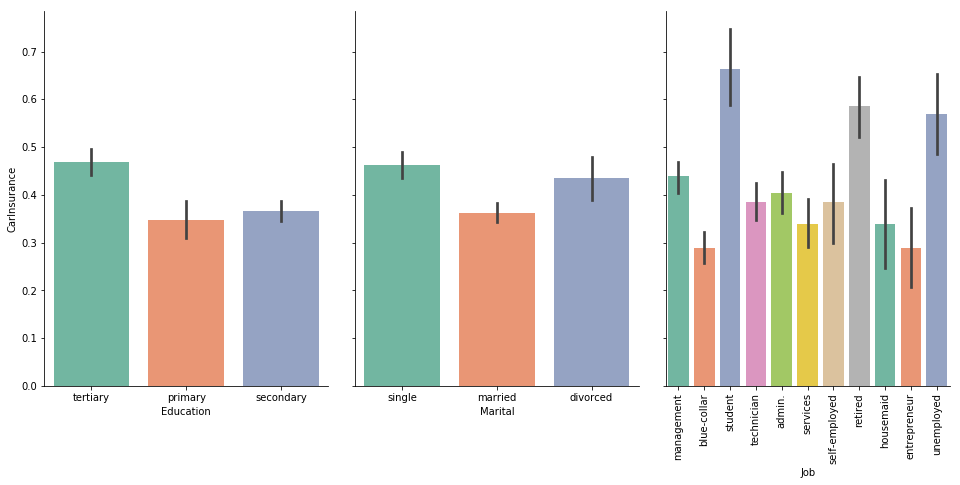

In [6]:
#pairgrid to compare categorical data
pg_cat = sns.PairGrid(insurance_df, x_vars=['Education', 'Marital', 'Job'], y_vars=['CarInsurance'], aspect=.75, size=6)
plt.xticks(rotation=90)
pg_cat.map(sns.barplot, palette='Set2');

C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\Masood\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


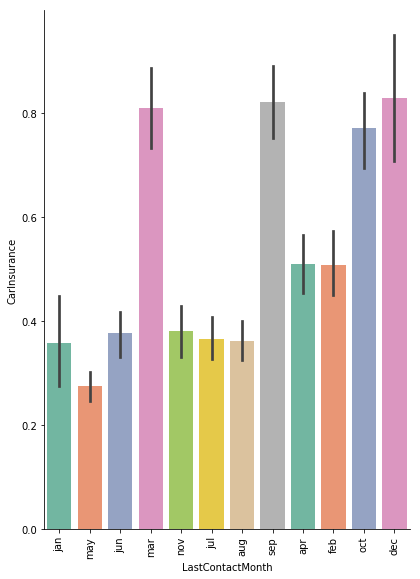

In [43]:
#could not figure out how to place the graphs on a second line so creating a new pairgrid 
pg_cat2 = sns.PairGrid(insurance_df, x_vars=['LastContactMonth'], y_vars=['CarInsurance'], aspect=.75, size=8)
plt.xticks(rotation=90)
pg_cat2.map(sns.barplot, palette='Set2');

Things to note:
- it seems that students and retired individuals buy car insurance
- Mar, Sep, Oct, and Dec have the highest call insurance sales 

## Cleaning

In [5]:
#formating the 'time' features to timedelta. then creating a new feature 'callduration'
#insurance_df['CallEnd'] = pd.to_timedelta(insurance_df['CallEnd']) #formated the 'callend' to a timedelta. no need to format
#insurance_df['CallStart'] = pd.to_timedelta(insurance_df['CallStart'])
#insurance_df['CallDuration'] = insurance_df['CallEnd'] - insurance_df['CallStart']

#UPDATE1: i am commenting out the following code as I no longer want to create a new 'lastcontact' feature. Will only use 'month'
#creating a new feature 'lastcontact' which will combine the month and day
#insurance_df['LastContactMonth'] = insurance_df['LastContactMonth'].astype(str)
#insurance_df['LastContactDay'] = insurance_df['LastContactDay'].astype(str)
#insurance_df['LastContact'] = insurance_df['LastContactMonth'] + ' ' + insurance_df['LastContactDay']
#insurance_df['LastContact'] = pd.to_datetime(insurance_df['LastContact'], format='%b %d')

#UPDATE2: No longer will change 'time' to timedelta. will use datetime
insurance_df['CallEnd'] = pd.to_datetime(insurance_df['CallEnd'])
insurance_df['CallStart'] = pd.to_datetime(insurance_df['CallStart'])
insurance_df['CallDuration'] = ((insurance_df['CallEnd'] - insurance_df['CallStart'])/np.timedelta64(1,'m')).astype(float)

#will remove 'lastcontactmonth', 'lastcontactday', 'callstart', 'callend' as I created a new combined column
#will also remore 'outcome' as it has over 3000 NaN
#UPDATE1: will now keep 'lastcontactmonth'
insurance_df.drop(columns=['CallStart', 'CallEnd', 'LastContactDay', 'Outcome'], inplace=True)
pop_car_insurance = insurance_df.pop('CarInsurance') #use the pop() to move 'carinsurance' to the end
insurance_df['CarInsurance'] = pop_car_insurance

In [6]:
insurance_df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallDuration,CarInsurance
Id,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,jan,2,-1,0,1.166667,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,may,5,-1,0,3.083333,0
3,29,management,single,tertiary,0,637,1,0,cellular,jun,1,119,1,5.666667,1
4,25,student,single,primary,0,373,1,0,cellular,may,2,-1,0,13.650000,1
5,30,management,married,tertiary,0,2694,0,0,cellular,jun,1,-1,0,3.200000,0


## Step 2: Feature Enginerring

In [6]:
#will bin 'Age', 'Balance', and 'CallDuration' into 5 bins
insurance_df['AgeBin'] = pd.qcut(insurance_df['Age'], 5 , labels=False)
insurance_df['BalanceBin'] = pd.qcut(insurance_df['Balance'], 5,labels=False)
insurance_df['CallDurationBin'] = pd.qcut(insurance_df['CallDuration'], 5, labels=False)

#one hot encode the categorical features, 'Job', 'Marital', 'Education', 'Communication', 'LastContactMonth'
insurance_df = pd.get_dummies(insurance_df, columns=['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth'])

#removing the 'old' converted features. Note, because you created dummys for 'Job', 'Marital'...you do not need to drop them
#they have already been dropped
insurance_df.drop(columns=['Age', 'Balance', 'CallDuration'], axis=1, inplace=True)

In [7]:
#note, the date set now contains 41 columns
insurance_df.head()
#insurance_df.columns
#insurance_df.to_csv('car_insurance_formated_final')

,Default,HHInsurance,CarLoan,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,AgeBin,BalanceBin,CallDurationBin,...,LastContactMonth_dec,LastContactMonth_feb,LastContactMonth_jan,LastContactMonth_jul,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,2,-1,0,0,1,3,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,5,-1,0,0,1,3,2,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,119,1,1,0,2,3,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,2,-1,0,1,0,2,4,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,1,-1,0,0,0,4,2,...,0,0,0,0,1,0,0,0,0,0


In [13]:
#creating our train/test split
from sklearn.model_selection import train_test_split

X = insurance_df.drop('CarInsurance', axis=1)
y = insurance_df['CarInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)
#since we are using cross validation, we don't need to divide our data into training and test sets
#we want all of the data in the training set so that we can apply cross validation on that

## Step 3: Testing Predictive Models

The dataset will be run through the following predictive machine learning models:
- Support Vector Machine 
- Random Forest
- Decision Tree
- K nearest neighboors
- Logistic Regression


***standardsclaer is z-score:
Firstly by subtracting the mean it brings the values around 0 – so has zero mean. Secondly, it divides the values by standard deviation thereby ensuring that the resulting distribution is standard with a mean of 0 and standard deviation of 1.***

In [10]:
#will use the pipline technique 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [11]:
#copied confusion matrix plotting function from the sklearn documentation:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Success','Failure']

In [66]:
#estimator.get_params().keys()
#this code will list all the paramaters for the estimators 

In [14]:
# Create the pipeline for SVM
pipe_svm = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('svm', svm.SVC(random_state=123))]);

# Create the grid parameter
grid_svm = [{'svm__kernel': ['poly', 'sigmoid'],
         'svm__C': [0.01, 1, 100],
         'svm__degree': [2,3,4,5],
         'svm__gamma': [0.001, 0.01]}];

# Create the grid, with "pipe" as the estimator
gridsearch_svm = GridSearchCV(estimator=pipe_svm,
                  param_grid=grid_svm,
                  scoring='accuracy',
                  cv=3);

# Fit using grid search
gridsearch_svm.fit(X_train, y_train);
best_parameters = gridsearch_svm.best_params_
best_score = gridsearch_svm.best_score_
print(best_parameters)
print(best_score)


{'svm__C': 1, 'svm__degree': 5, 'svm__gamma': 0.01, 'svm__kernel': 'sigmoid'}
0.6946875


The best parameters for SVM are:
- C: 1
- Degree: 5
- Gamma: 0.01
- Kernel: Sigmoid

And the accuracy is: 70%

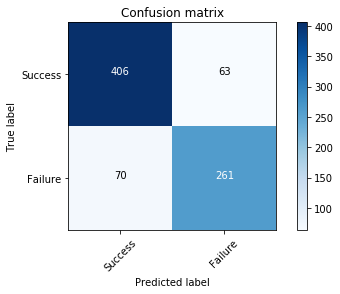

In [17]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [18]:
# Create the pipeline for Random Forest
pipe_rf = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('clf', RandomForestClassifier(random_state=123))]);

# Create the grid parameter
grid_rf = [{'clf__n_estimators': [100, 120],
            'clf__criterion': ['entropy', 'gini'], 
            'clf__max_depth': [5, 8, 10],
            'clf__min_samples_leaf':[0.05, 0.1, 0.2],
            'clf__min_samples_split':[2, 3, 10]}];

# Create the grid, with "pipe" as the estimator
gridsearch_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=grid_rf,
                  scoring='accuracy',
                  cv=3);

# Fit using grid search
gridsearch_rf.fit(X_train, y_train);
best_parameters = gridsearch_rf.best_params_
best_score = gridsearch_rf.best_score_
print(best_parameters)
print(best_score)

{'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 3, 'clf__n_estimators': 100}
0.68625


The best parameters for Random Forest are:
- Criterion: gini
- Max Depth: 8
- Min Samples Leaf: 0.05
- Min Samples Split: 3
- N Estimators: 10

And the accuracy score is: 69%

In [19]:
# Create the pipeline for Decison Tree
pipe_dt = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('clf', tree.DecisionTreeClassifier(random_state=123))])

# Create the grid parameter
grid_dt = [{'clf__criterion': ['entropy', 'gini'], 
            'clf__max_depth': [5, 7, 10],
            'clf__min_samples_leaf':[0.05 ,0.1, 0.2],
            'clf__min_samples_split':[2, 5, 10]}]

# Create the grid, with "pipe" as the estimator
gridsearch_dt = GridSearchCV(estimator=pipe_dt,
                  param_grid=grid_dt,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch_dt.fit(X_train, y_train);
best_parameters = gridsearch_dt.best_params_
best_score = gridsearch_dt.best_score_
print(best_parameters)
print(best_score)


{'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 10}
0.675


The best parameters for Decision Tree are:
- Criterion: gini
- Max Depth: 5
- Min Samples Leaf: 0.05
- Min Samples Split: 10

And the accuracy score is: 68%

In [20]:
# Create the pipeline for kNN
pipe_knn = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('clf', KNeighborsClassifier())])

# Create the grid parameter
grid_knn = [{'clf__n_neighbors': [3, 5, 7], 
            'clf__p': [1, 2],
            'clf__weights':['uniform', 'distance']}]

# Create the grid, with "pipe" as the estimator
gridsearch_knn = GridSearchCV(estimator=pipe_knn,
                  param_grid=grid_knn,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch_knn.fit(X_train, y_train);
best_parameters = gridsearch_knn.best_params_
best_score = gridsearch_knn.best_score_
print(best_parameters)
print(best_score)

{'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'distance'}
0.6875


The best parameters for kNN are:
- kNN: 5
- P: 1
- Weights: distance

And the accuracy score is: 69%

In [21]:
# Create the pipeline for LR
pipe_lr = Pipeline([('scl', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('clf', LogisticRegression())])

# Create the grid parameter
grid_lr = [{'clf__C': [0.8, 0.9, 1.0, 1.1], 
            'clf__penalty': ['l1', 'l2'],
            'clf__random_state':[1, 5, 10]}]

# Create the grid, with "pipe" as the estimator
gridsearch_lr = GridSearchCV(estimator=pipe_lr,
                  param_grid=grid_lr,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch_lr.fit(X_train, y_train);
best_parameters = gridsearch_lr.best_params_
best_score = gridsearch_lr.best_score_
print(best_parameters)
print(best_score)

{'clf__C': 0.8, 'clf__penalty': 'l1', 'clf__random_state': 10}
0.698125


The best parameters for Logistic Regression are:
- C: 0.8
- Penalty: 11
- Random State: 10

And the accuracy score is: 70%

## FEATURE IMPORTANCES

Feature importance is done by using models such as Logistic Regression and Decision trees.

[0.00290795 0.03902096 0.02030431 0.05905151 0.04456504 0.03689952
 0.05340615 0.06330379 0.28511894 0.01323192 0.01155956 0.00547339
 0.00455658 0.01454213 0.00820157 0.00648681 0.00900505 0.00705168
 0.0145466  0.00647028 0.01185327 0.01374285 0.01457905 0.01147062
 0.01778652 0.01667712 0.03124558 0.01027211 0.01826838 0.01911932
 0.00462444 0.01170996 0.0083376  0.01289634 0.01724573 0.01461272
 0.01670487 0.01215633 0.01569844 0.01529503]


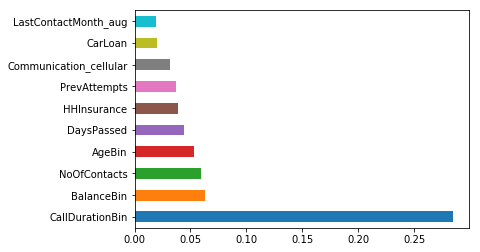

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Final Thoughts

After evaulating each model and adjusting parameters, SVM had the highest precentage (70%). The most determining feature seems to be CallDuration. While exploring the data, I noticed that students, retired, and unemployed individuals buy car insurance more so than others. Unemployed was surprising. This could be that since they do not have a steady income, they may want to protect themselves from a large cost from a car acident. To improve the model, I could tweet or add different parameters. 70% is accetable, but 85% or greater would have been great.